In [1]:
from pipeline import * 
import pandas as pd 
from utilities.models import *
from utilities.scores import *






In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier




In [3]:
data= pd.read_csv("client_data.csv",index_col=False)
data_list= []
for i in range(1,3):
    X_train, X_test, y_train, y_test= simple_pipeline(data.copy(),i)
    data_list.append((X_train, X_test, y_train, y_test))
print("upsampled data \n",data_list[0][2].value_counts())
print("up and sampled data \n",data_list[1][2].value_counts())


upsampled data 
 0    11230
1     8422
Name: churn, dtype: int64
up and sampled data 
 0    8422
1    8422
Name: churn, dtype: int64


In [4]:
data_loc= ["FE.csv","higher_order_data.csv"]
for file in data_loc:
    data=pd.read_csv(file,index_col=False)
    if "id" in data.columns: 
        data.drop(columns=["id"],inplace=True)
    if "Unnamed: 0" in data.columns: 
        data.drop(columns=["Unnamed: 0"],inplace=True)
    
    for i in range(1,3):
        X_train, X_test, y_train, y_test= simple_pipeline_cleaned_data(data,i)
        data_list.append((X_train, X_test, y_train, y_test))
    

In [5]:
len(data_list)

6

In [6]:
score_dataframe= pd.DataFrame()

<B>The modelling logic</B>

Before modelling complex models such as Random Forest orXGboost, I will try applying the diffferent data preperation on logistic regression and will pursue using the best fitted feature engineered data in testing the complex models. 

Afterwards, I will move to see the feature importance.

## Logistic Regression 

In [7]:

lr_list=[]
for i,data in enumerate(data_list):
    X_train,X_test, y_train, y_test= data
    
    lr,gr = logistic_regression(X_train, y_train)
    y_predict= lr.predict(X_test)
    
    score_dataframe= score_dataframe.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)
    lr_list.append(lr)
    print("----------------------")

{'C': 2.5, 'penalty': 'l2'}
Best Acc =  63.98774155652131
Accuracy Score: 73.71 || precision_weighted accuracy: 82.30  || recall_weighted accuracy 73.71 || f1_weighted 77.37 || Area under curve 54.43
Confusion matrix 
[[1545  412]
 [ 164   70]]


/tmp/ipykernel_8852/2922259470.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataframe= score_dataframe.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)


----------------------
{'C': 0.5, 'penalty': 'l1'}
Best Acc =  70.30076287004057
Accuracy Score: 66.04 || precision_weighted accuracy: 82.50  || recall_weighted accuracy 66.04 || f1_weighted 72.23 || Area under curve 55.03
Confusion matrix 
[[1351  606]
 [ 138   96]]
----------------------


/tmp/ipykernel_8852/2922259470.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataframe= score_dataframe.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)


{'C': 4.0, 'penalty': 'l2'}
Best Acc =  62.00335932127319
Accuracy Score: 75.61 || precision_weighted accuracy: 85.03  || recall_weighted accuracy 75.61 || f1_weighted 79.51 || Area under curve 58.44
Confusion matrix 
[[1560  398]
 [ 130   77]]
----------------------


/tmp/ipykernel_8852/2922259470.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataframe= score_dataframe.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)


{'C': 0.5, 'penalty': 'l1'}
Best Acc =  69.0206131334165
Accuracy Score: 66.74 || precision_weighted accuracy: 85.18  || recall_weighted accuracy 66.74 || f1_weighted 73.43 || Area under curve 58.72
Confusion matrix 
[[1344  614]
 [ 106  101]]
----------------------


/tmp/ipykernel_8852/2922259470.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataframe= score_dataframe.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)


{'C': 1.0, 'penalty': 'l2'}
Best Acc =  63.26800525176791
Accuracy Score: 76.81 || precision_weighted accuracy: 85.29  || recall_weighted accuracy 76.81 || f1_weighted 80.34 || Area under curve 59.32
Confusion matrix 
[[1585  373]
 [ 129   78]]
----------------------


/tmp/ipykernel_8852/2922259470.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataframe= score_dataframe.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)


{'C': 0.5, 'penalty': 'l1'}
Best Acc =  69.84311752826659
Accuracy Score: 67.94 || precision_weighted accuracy: 85.41  || recall_weighted accuracy 67.94 || f1_weighted 74.32 || Area under curve 59.60
Confusion matrix 
[[1369  589]
 [ 105  102]]
----------------------


/tmp/ipykernel_8852/2922259470.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataframe= score_dataframe.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)


In [64]:
titles= ["upsampled data", "up and down sampled data",
         "US_merged_noOutliers_data","UDS_merged_noOutliers","US_clean_merged_Higher_order_variable",
         "UDS_clean_merged_Higher_order_variable"] 
columns= ["accracy","precision_weighted","recall_weighted","f1_weigthed","auc"] 

In [20]:
score_dataframe.columns = columns
score_dataframe.index= titles

In [21]:
score_dataframe

,accracy,precision_weighted,recall_weighted,f1_weigthed,auc
upsampled data,73.710634,82.299621,73.710634,77.374321,54.430949
up and down sampled data,66.042903,82.502324,66.042903,72.226327,55.029939
US_merged_noOutliers_data,75.612009,85.031889,75.612009,79.507954,58.435602
UDS_merged_noOutliers,66.743649,85.178014,66.743649,73.426764,58.716871
US_clean_merged_Higher_order_variable,76.812933,85.285745,76.812933,80.341678,59.315554
UDS_clean_merged_Higher_order_variable,67.944573,85.407765,67.944573,74.322799,59.596823


In [11]:
X_train,X_test, y_train, y_test= data_list[4]
model_scores= pd.DataFrame()
rows= [] 

## Random Forest 

In [12]:
rf_random_search = random_forest_random_search(X_train,y_train)

{'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 70, 'criterion': 'gini'}
Best Acc =  87.87783152716653


In [13]:
'''
hp= {"criterion":['gini'],
     'max_depth':[15],
     'min_samples_split':np.arange(23,27,1),
     'min_samples_leaf':np.arange(12,17,1)}
rf_model,grid= random_forest(X_train,y_train,hp)
'''

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 12, 'min_samples_split': 24}
Best Acc =  86.23639606974403


In [15]:
rf_model,_= random_forest(X_train,y_train,{'criterion': ['gini'], 'max_depth': [15], 'min_samples_leaf': [12], 'min_samples_split': [24]})

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 12, 'min_samples_split': 24}
Best Acc =  86.06515596933922


In [16]:
y_predict= rf_model.predict(X_test)
model_scores= model_scores.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)
rows+=["Random Forest"]

Accuracy Score: 88.22 || precision_weighted accuracy: 85.53  || recall_weighted accuracy 88.22 || f1_weighted 86.65 || Area under curve 55.90
Confusion matrix 
[[1877   81]
 [ 174   33]]


/tmp/ipykernel_8852/2854253395.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores= model_scores.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)


## SVC 

In [ ]:
svc_random_search= SVC_random_search(X_train,y_train)

In [ ]:
hp= {"kernel":['rbf'],
     'gamma':[15],
     'C':np.arange(23,27,1)}
svc_model,grid= SVC_grid(X_train,y_train,hp)

In [ ]:
y_predict= svc_model.predict(X_test)
model_scores= model_scores.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)
rows+=["SVC"]

## XGBoost

In [17]:
#xgb, rand_Search = XGB_random_Search(X_train,y_train)
xgb = XGB.XGBClassifier(**{'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.0})
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [18]:
y_predict= xgb.predict(X_test)
model_scores= model_scores.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)
rows+=["XGBoost"]

Accuracy Score: 90.35 || precision_weighted accuracy: 87.57  || recall_weighted accuracy 90.35 || f1_weighted 88.07 || Area under curve 57.08
Confusion matrix 
[[1923   35]
 [ 174   33]]


/tmp/ipykernel_8852/3891498325.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores= model_scores.append(pd.Series([*report_scores(y_test,y_predict)]),ignore_index=True)


## Score Summary 

In [66]:
model_scores.columns=columns
model_scores.index=rows
model_scores

,accracy,precision_weighted,recall_weighted,f1_weigthed,auc
Random Forest,88.221709,85.533989,88.221709,86.652123,55.902577
XGBoost,90.346420,87.574573,90.346420,88.072153,57.077245


## Feature Importance 

### Showing the results of the random forest overfitting

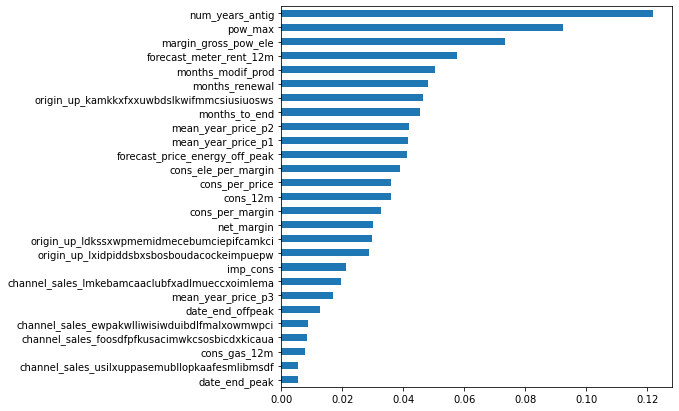

In [24]:
plt.figure(figsize=(7,7))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh');


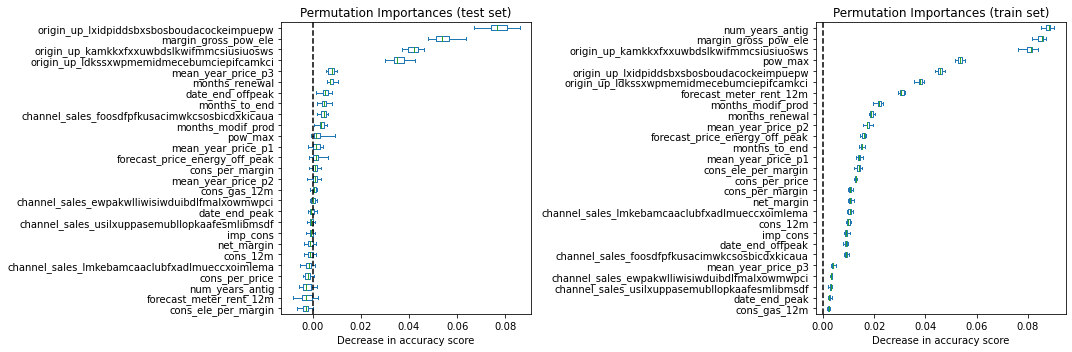

In [22]:
from sklearn.inspection import permutation_importance
#calculate permutation importance for test data 
result_test = permutation_importance(
    rf_model, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_test = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx_test].T,
    columns=X_train.columns[sorted_importances_idx_test],
)

#calculate permutation importance for training data 
result_train = permutation_importance(
    rf_model, X_train, y_train, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_train = result_train.importances_mean.argsort()
importances_train = pd.DataFrame(
    result_train.importances[sorted_importances_idx_train].T,
    columns=X_train.columns[sorted_importances_idx_train],
)

f, axs = plt.subplots(1,2,figsize=(15,5))

importances_test.plot.box(vert=False, whis=10, ax = axs[0])
axs[0].set_title("Permutation Importances (test set)")
axs[0].axvline(x=0, color="k", linestyle="--")
axs[0].set_xlabel("Decrease in accuracy score")
axs[0].figure.tight_layout()

importances_train.plot.box(vert=False, whis=10, ax = axs[1])
axs[1].set_title("Permutation Importances (train set)")
axs[1].axvline(x=0, color="k", linestyle="--")
axs[1].set_xlabel("Decrease in accuracy score")
axs[1].figure.tight_layout()

### Studying The feature Importance for Logistic reression

In [23]:
lr_list[4].coef_


array([[-0.70054815, -0.2220118 ,  0.19160407, -0.38666572, -0.0571048 ,
         1.33912059,  0.41042363, -0.32644727, -0.39498669, -0.91139473,
        -0.45570797, -2.0482689 , -0.99389598, -1.71107004, -1.56750217,
        -3.81187503, -3.66197827, -2.87347985, -0.12530618, -0.03982674,
        -0.27070649,  0.52738151,  1.3784929 , -1.57746806, -0.10209182,
         1.12727318,  0.16254859]])

In [46]:
coeff= np.transpose(lr_list[4].coef_)
feat_importance= pd.DataFrame(zip(data_list[4][0].columns, np.transpose(lr_list[4].coef_),np.exp(coeff)), 
             columns=['features', 'coef','exp_Beta'])

feat_importance["effect_in_percentage"]= abs(feat_importance.exp_Beta - 1)*100
feat_importance

,features,coef,exp_Beta,effect_in_percentage
0,cons_12m,[-0.7005481505206428],[0.4963131748892063],[50.36868251107938]
1,cons_gas_12m,[-0.2220117987799681],[0.8009059145662503],[19.909408543374973]
2,forecast_meter_rent_12m,[0.19160406534696692],[1.211190869579952],[21.119086957995204]
3,forecast_price_energy_off_peak,[-0.3866657239205641],[0.679318136780645],[32.0681863219355]
4,imp_cons,[-0.057104796834701065],[0.944495084084739],[5.550491591526097]
5,margin_gross_pow_ele,[1.3391205901940164],[3.8156864773762553],[281.56864773762555]
6,net_margin,[0.4104236349421441],[1.5074562610088724],[50.74562610088724]
7,num_years_antig,[-0.32644726992476364],[0.7214824178677793],[27.851758213222066]
8,pow_max,[-0.39498668730372205],[0.6736890078063164],[32.631099219368366]
9,date_end_offpeak,[-0.9113947299449984],[0.4019632027723104],[59.80367972276896]


In [47]:
feat_importance[11:18]

,features,coef,exp_Beta,effect_in_percentage
11,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,[-2.0482688980494426],[0.12895794983270423],[87.10420501672958]
12,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,[-0.9938959813234358],[0.3701318515349896],[62.98681484650104]
13,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,[-1.711070042212141],[0.18067236209215917],[81.93276379078408]
14,channel_sales_usilxuppasemubllopkaafesmlibmsdf,[-1.5675021675853675],[0.20856549391222826],[79.14345060877717]
15,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,[-3.8118750287703227],[0.022106689393500783],[97.78933106064991]
16,origin_up_ldkssxwpmemidmecebumciepifcamkci,[-3.661978272849377],[0.02568165711481048],[97.43183428851894]
17,origin_up_lxidpiddsbxsbosboudacockeimpuepw,[-2.8734798460686863],[0.05650196593820161],[94.34980340617984]


In [54]:
feat_importance[feat_importance.coef> 0].sort_values("effect_in_percentage",ascending=False)

,features,coef,exp_Beta,effect_in_percentage
22,mean_year_price_p2,[1.3784929034666558],[3.9689155789411075],[296.89155789411075]
5,margin_gross_pow_ele,[1.3391205901940164],[3.8156864773762553],[281.56864773762555]
25,cons_ele_per_margin,[1.127273181660626],[3.0872267056901377],[208.72267056901376]
21,mean_year_price_p1,[0.5273815089746867],[1.6944894888961175],[69.44894888961176]
6,net_margin,[0.4104236349421441],[1.5074562610088724],[50.74562610088724]
2,forecast_meter_rent_12m,[0.19160406534696692],[1.211190869579952],[21.119086957995204]
26,cons_per_margin,[0.1625485899657314],[1.1765054834209794],[17.650548342097938]


In [62]:
feat_importance.drop(index=[11,12,13,14,15,16,17])[feat_importance.coef< 0].sort_values("effect_in_percentage",ascending=False)

/tmp/ipykernel_8852/3273459528.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feat_importance.drop(index=[11,12,13,14,15,16,17])[feat_importance.coef< 0].sort_values("effect_in_percentage",ascending=False)


,features,coef,exp_Beta,effect_in_percentage
23,mean_year_price_p3,[-1.5774680623995792],[0.20649727508145246],[79.35027249185475]
9,date_end_offpeak,[-0.9113947299449984],[0.4019632027723104],[59.80367972276896]
0,cons_12m,[-0.7005481505206428],[0.4963131748892063],[50.36868251107938]
10,date_end_peak,[-0.45570797494332754],[0.6339989536482674],[36.60010463517326]
8,pow_max,[-0.39498668730372205],[0.6736890078063164],[32.631099219368366]
3,forecast_price_energy_off_peak,[-0.3866657239205641],[0.679318136780645],[32.0681863219355]
7,num_years_antig,[-0.32644726992476364],[0.7214824178677793],[27.851758213222066]
20,months_renewal,[-0.2707064900335455],[0.7628403647995382],[23.71596352004618]
1,cons_gas_12m,[-0.2220117987799681],[0.8009059145662503],[19.909408543374973]
18,months_to_end,[-0.12530617788578746],[0.8822267429093177],[11.777325709068231]


In [61]:
feat_importance.drop()

,features,coef,exp_Beta,effect_in_percentage
0,cons_12m,[-0.7005481505206428],[0.4963131748892063],[50.36868251107938]
1,cons_gas_12m,[-0.2220117987799681],[0.8009059145662503],[19.909408543374973]
2,forecast_meter_rent_12m,[0.19160406534696692],[1.211190869579952],[21.119086957995204]
3,forecast_price_energy_off_peak,[-0.3866657239205641],[0.679318136780645],[32.0681863219355]
4,imp_cons,[-0.057104796834701065],[0.944495084084739],[5.550491591526097]
5,margin_gross_pow_ele,[1.3391205901940164],[3.8156864773762553],[281.56864773762555]
6,net_margin,[0.4104236349421441],[1.5074562610088724],[50.74562610088724]
7,num_years_antig,[-0.32644726992476364],[0.7214824178677793],[27.851758213222066]
8,pow_max,[-0.39498668730372205],[0.6736890078063164],[32.631099219368366]
9,date_end_offpeak,[-0.9113947299449984],[0.4019632027723104],[59.80367972276896]


coefficients cannot be very helpful this is due to the fact that there like lots of techincal info that are fully numerical represented in the first 10 columns. and other non-technical columns rpresented in the last 7 columns 
However we can drew the following conclusions
#### For Categorical and ordinal data  
1. The whole three origin up distributions that e have does reduce the rate of churn ability with a ratio of >90 whih is a little oddd thing. This observation makes me feel
       - it did overfit on this column or there was not a difference between those those channels
       - rather the challenge did exist if there is origin up dsitribution or not. This implies that we can shorten these three columns into only 1 column "has orgin_up" or not

2. The varience in importance in the channel sales was significant where different channel sales, reduced the churn rate with different ratio with haveing the "ewpakwlliwisiwduibdlfmalxowmwpci" is the best as it reduced the chur with 84%

3. num_years_antig: Every year does the client spend with us ddoes reduce his churn rate with 27% <B>from the year before</B> 

#### For Numerical Data 

